# Customer Churn Analysis

This notebook focuses on exploratory data analysis to identify patterns and factors contributing to customer churn.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### Data Loading

In [33]:
df = pd.read_csv('telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [35]:
# Convert blank TotalCharges values to 0 and cast column to float

df["TotalCharges"] = df["TotalCharges"].replace(" ", 0).astype("float")

In [36]:
df.isnull().sum().sum()

np.int64(0)

In [37]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [38]:
df["customerID"].duplicated().sum()

np.int64(0)

### Feature Preparation

In [39]:
# Convert SeniorCitizen from numeric to categorical

def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

### Exploratory Data Analysis (EDA)

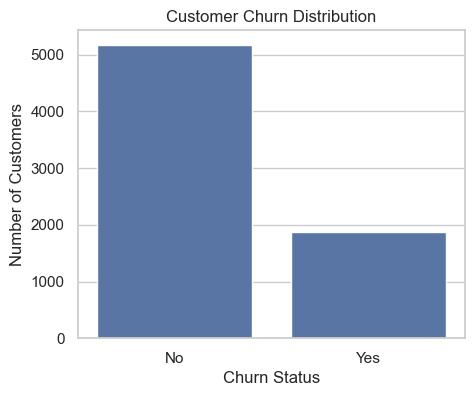

In [40]:
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.show()

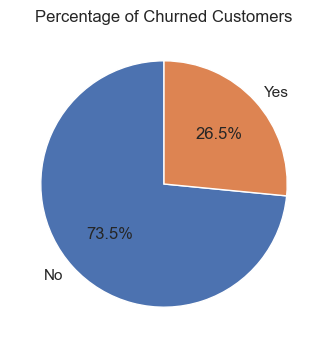

In [41]:
plt.figure(figsize=(4,4))
gb = df.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb["Churn"], labels=gb.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Churned Customers")
plt.show()

**Insight:** A significant share of customers have churned, highlighting retention concerns.

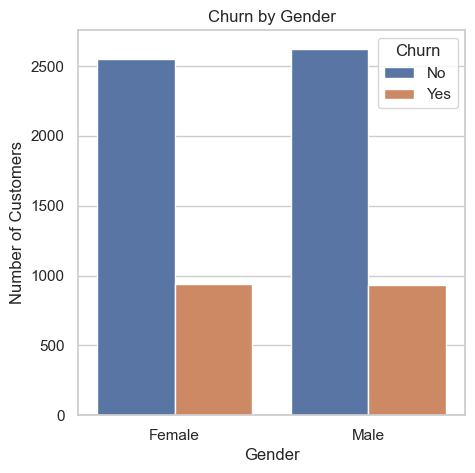

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

**Insight:** Churn levels appear comparable across genders, suggesting gender may not be a primary driver of churn.

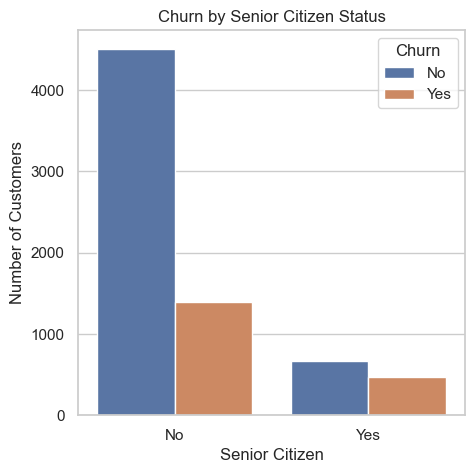

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

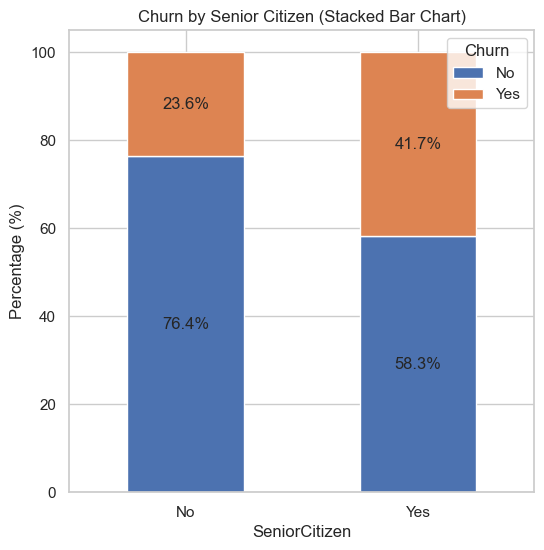

In [44]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

fig, ax = plt.subplots(figsize = (6, 6))

total_counts.plot(kind = 'bar', stacked = True, ax = ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation = 0)
plt.legend(title = "Churn", loc = "upper right")
plt.show()

**Insight:** While senior and non-senior customers differ in volume, senior citizens show a higher churn proportion when viewed in percentage terms.

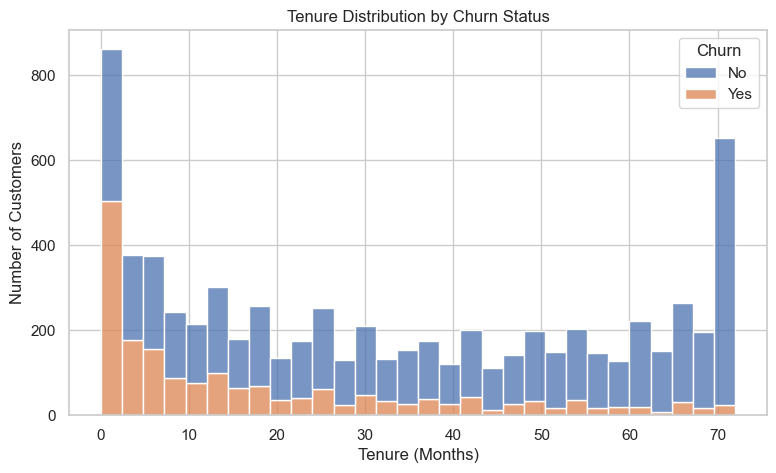

In [45]:
plt.figure(figsize=(9,5))
sns.histplot(x="tenure", data=df, bins=30, hue="Churn", multiple="stack")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

**Insight:** Customers with shorter tenure are more likely to churn, while long-term customers show higher retention.

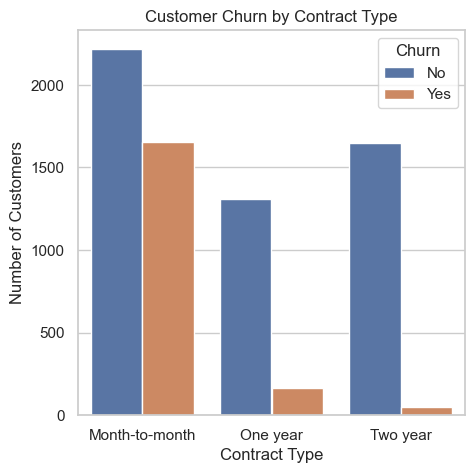

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Customer Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

**Insight:** Customers on month-to-month contracts exhibit higher churn compared to those on longer-term contracts.

In [47]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

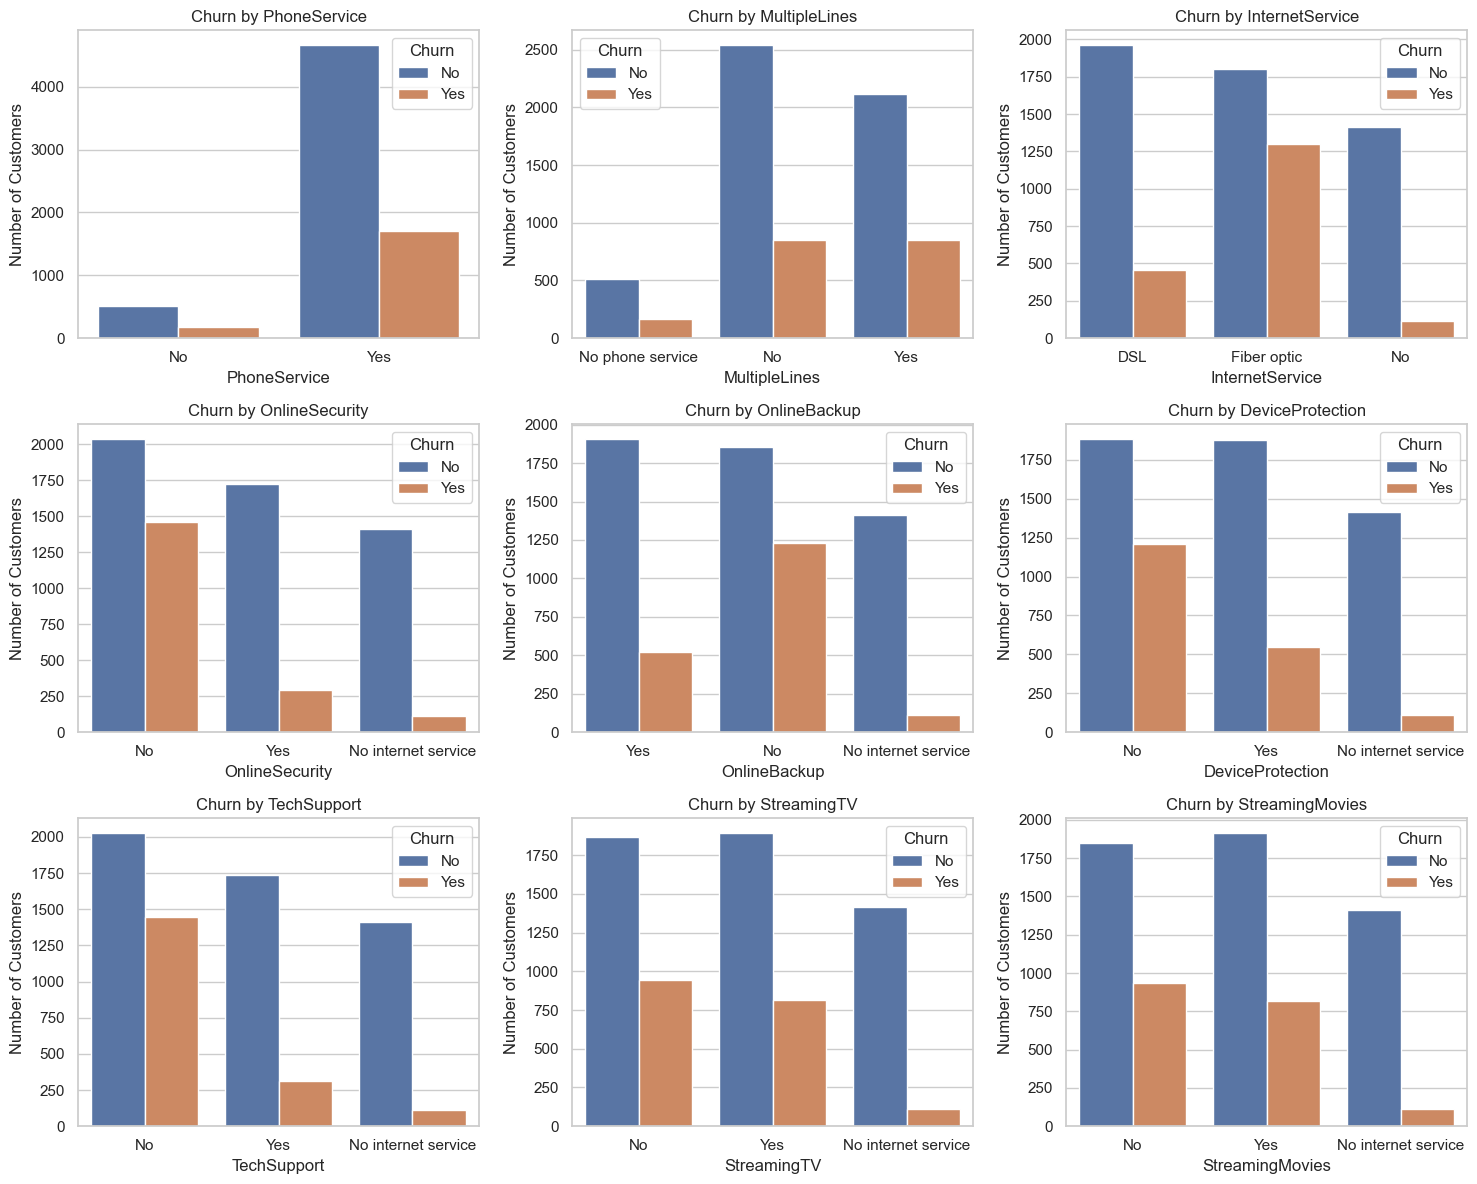

In [48]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Number of Customers")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight:** Customers lacking value-added services such as online security, tech support, and backup services tend to exhibit higher churn, indicating that service engagement plays a key role in retention.

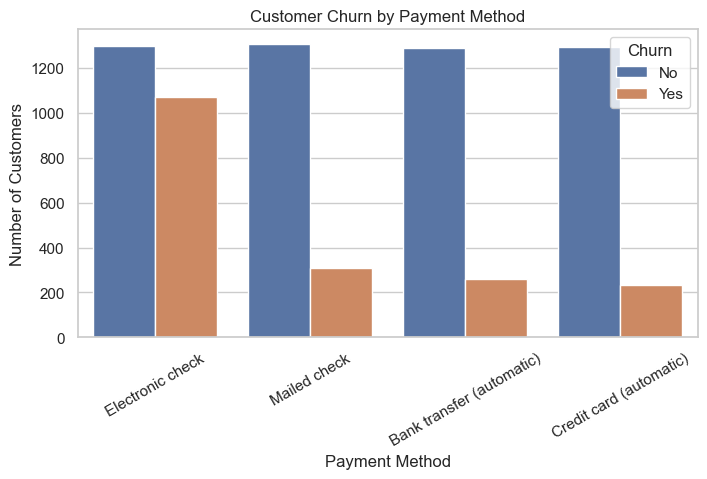

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Customer Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.show()

**Insight:** Customers using electronic check payment methods show a higher churn rate compared to other payment options. This may indicate lower customer commitment or friction in the payment experience.

### Conclusion

This analysis examined customer churn across demographic factors, service usage, tenure, contract types, and payment methods. The results
indicate that customers with shorter tenure, month-to-month contracts, limited service adoption, and electronic check payments are more
likely to churn. These insights can support targeted retention strategies focused on early engagement and value-added services.
